In [2]:
# Find an optimal k to use in the k-NN algorithm in order to predict "Survived" on the Titanic dataset. Plot k vs. accuracy. Use the most accurate k to predict "Survived" for the test set.

import pandas as pd

# Read the pre-split train and test sets
train = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/test.csv')

29.8496231131986

In [3]:
# Preprocess both sets

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

CATEGORICAL_FEATURES = ['Pclass', 'Sex', 'Embarked']
NUMERIC_FEATURES = [ 'Age', 'SibSp', 'Parch', 'Fare'  ]

def preprocess(df):
    preprocessed_df = df[CATEGORICAL_FEATURES + NUMERIC_FEATURES].copy()
    preprocessed_df[CATEGORICAL_FEATURES] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(preprocessed_df[CATEGORICAL_FEATURES] )
    preprocessed_df[NUMERIC_FEATURES] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(preprocessed_df[NUMERIC_FEATURES])
    preprocessed_df[NUMERIC_FEATURES] = StandardScaler().fit_transform(preprocessed_df[NUMERIC_FEATURES])
    return pd.get_dummies(preprocessed_df, columns=CATEGORICAL_FEATURES)

y_train = train["Survived"]
X_train = preprocess(train.drop(columns=["Survived"]))
X_test = preprocess(test)  # No "Survived" in test

X_train

/Users/minor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0,0,1,0,1,0,0,1
1,0.638789,0.432793,-0.473674,0.786845,1,0,0,1,0,1,0,0
2,-0.284663,-0.474545,-0.473674,-0.488854,0,0,1,1,0,0,0,1
3,0.407926,0.432793,-0.473674,0.420730,1,0,0,1,0,0,0,1
4,0.407926,-0.474545,-0.473674,-0.486337,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671,0,1,0,0,1,0,0,1
887,-0.823344,-0.474545,-0.473674,-0.044381,1,0,0,1,0,0,0,1
888,0.000000,0.432793,2.008933,-0.176263,0,0,1,1,0,0,0,1
889,-0.284663,-0.474545,-0.473674,-0.044381,1,0,0,0,1,1,0,0


In [4]:
# Calculate the accuracy for each k on the training set using 5-fold cross-validation

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

accuracies_by_k = {}
for k in range(1, 40):
    classifier = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy").mean()
    # classifier.fit(smaller_X_train, smaller_y_train)
    # accuracy = classifier.score(X_validation, y_validation)
    print(f"Accuracy with k={k}:", accuracy)
    accuracies_by_k[k] = accuracy

best_k, best_accuracy = max(accuracies_by_k.items(), key=lambda item: item[1])
print(f"Best validation accuracy ({best_accuracy:0.2f}) with k={best_k}")

/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Accuracy with k=1: 0.7374489988073567
Accuracy with k=2: 0.7901889398029001
Accuracy with k=3: 0.7912748728893353
Accuracy with k=4: 0.7968865733475614


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Accuracy with k=5: 0.8047454648170234
Accuracy with k=6: 0.8047078023978406
Accuracy with k=7: 0.799114933149206
Accuracy with k=8: 0.7957315924926244


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Accuracy with k=9: 0.8013432929508506
Accuracy with k=10: 0.8080723118448307
Accuracy with k=11: 0.80023225158496
Accuracy with k=12: 0.8080911430544223


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Accuracy with k=13: 0.8002259745150964
Accuracy with k=14: 0.8047203565375683
Accuracy with k=15: 0.8002385286548239
Accuracy with k=16: 0.8047078023978408


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Accuracy with k=17: 0.8103257799259305
Accuracy with k=18: 0.8058313979034587
Accuracy with k=19: 0.8035904839620865
Accuracy with k=20: 0.8148201619484026


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Accuracy with k=21: 0.8103383340656581
Accuracy with k=22: 0.8136965664427847
Accuracy with k=23: 0.8081036971941498
Accuracy with k=24: 0.8137028435126483


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Accuracy with k=25: 0.8081036971941498
Accuracy with k=26: 0.8170736300295023
Accuracy with k=27: 0.8069801016885318
Accuracy with k=28: 0.807005209967987


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Accuracy with k=29: 0.804758018956751
Accuracy with k=30: 0.8092461239093591
Accuracy with k=31: 0.8047642960266147
Accuracy with k=32: 0.8092398468394952


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Accuracy with k=33: 0.8013935095097608
Accuracy with k=34: 0.8025171050153789
Accuracy with k=35: 0.8013997865796247
Accuracy with k=36: 0.8036407005209968


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Accuracy with k=37: 0.8025171050153788
Accuracy with k=38: 0.8002699140041429
Accuracy with k=39: 0.804758018956751
Best validation accuracy (0.82) with k=26


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:xlabel='k', ylabel='accuracy'>

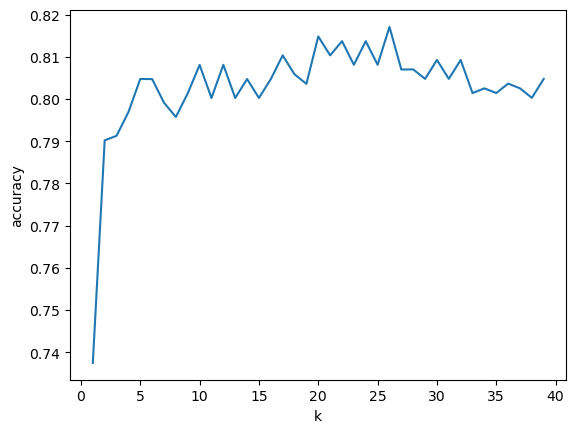

In [6]:
# Plot the k vs. accuracy curve
%matplotlib inline
import seaborn as sns
sns.lineplot(
    data=pd.DataFrame({"k": list(accuracies_by_k.keys()), "accuracy": list(accuracies_by_k.values())}),
    x="k",
    y="accuracy"
)

In [5]:
# Predict "Survived" for the test set by using the best k

survived = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train).predict(X_test)
survived

/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,